<a href="https://colab.research.google.com/github/NishatVasker/XAI_-Explainable_AI-/blob/main/CSE407.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Assuming your dataset is in a CSV file named 'your_dataset.csv'
df = pd.read_csv('/content/ThingSpeakData.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1909 entries, 0 to 1908
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1909 non-null   object 
 1   Time      1909 non-null   object 
 2   entry_id  1909 non-null   int64  
 3   field1    1909 non-null   float64
 4   field2    1909 non-null   float64
 5   field3    1909 non-null   float64
 6   field4    1909 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 104.5+ KB


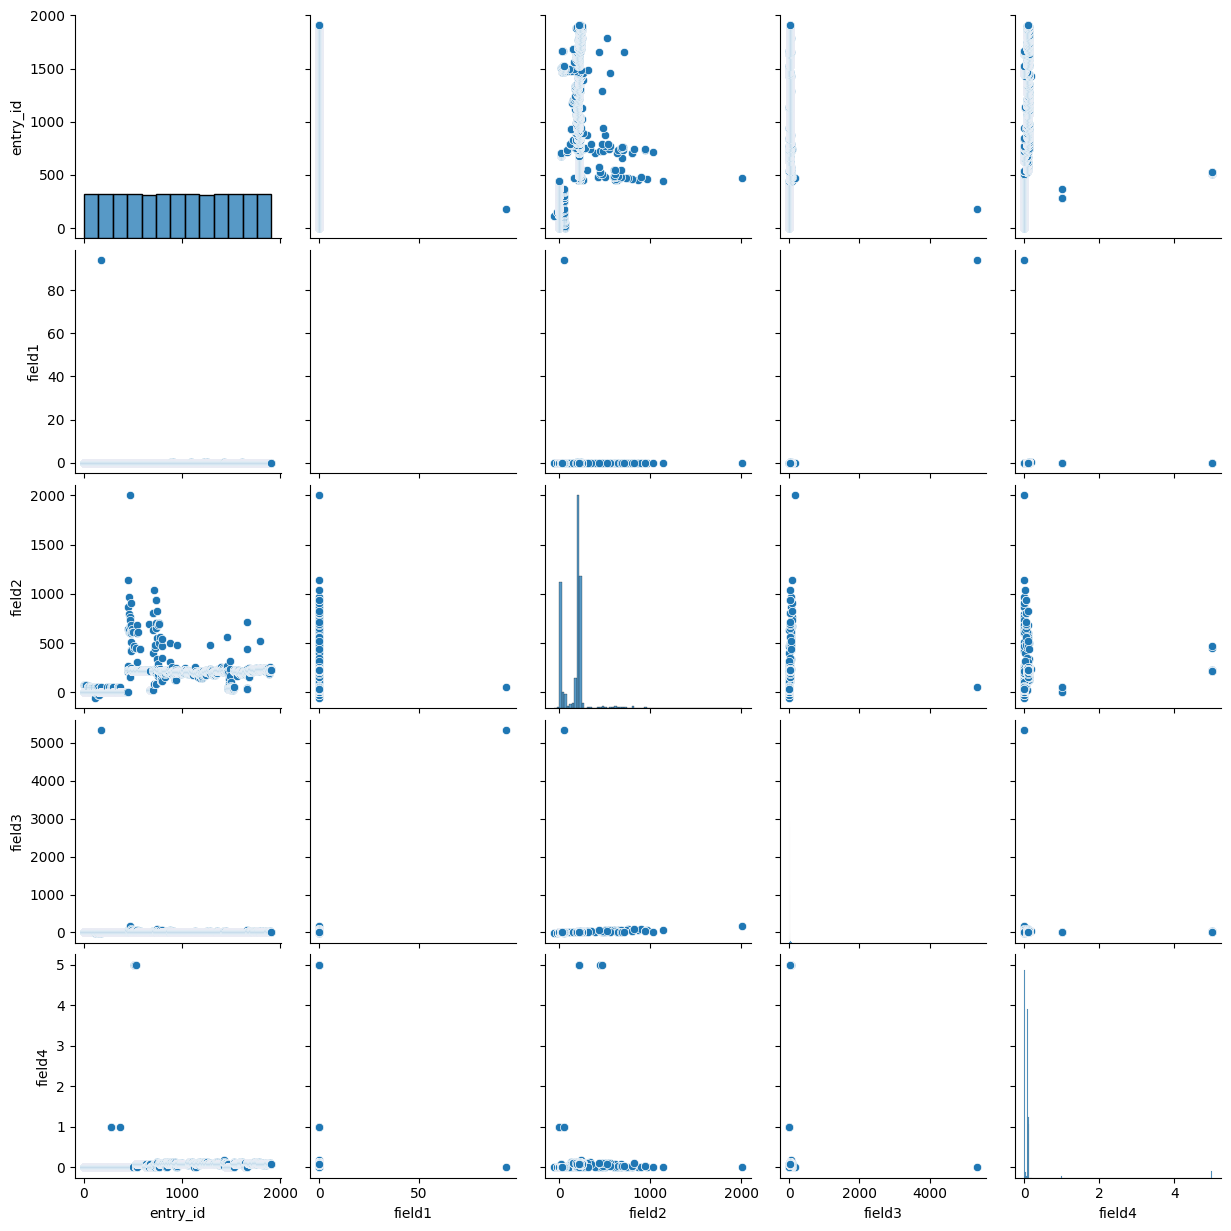

In [15]:
# Display basic information about the dataset
df.info()

# Display summary statistics
df.describe()

# Check for missing values
df.isnull().sum()

# Visualize data distribution
sns.pairplot(df)
plt.show()


In [4]:
# Handle missing values (if needed)
df.fillna(0, inplace=True)

# Encode categorical variables (if needed)
# Example: df = pd.get_dummies(df, columns=['categorical_column'])


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Example: Assuming 'field1', 'field2', 'field3' as features and 'entry_id' as the target variable
X = df[['field1', 'field2', 'field3','field4']]
y = df['entry_id']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')


Mean Squared Error: 241334.94456139134


In [7]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 4.3 MB/s eta 0:00:00


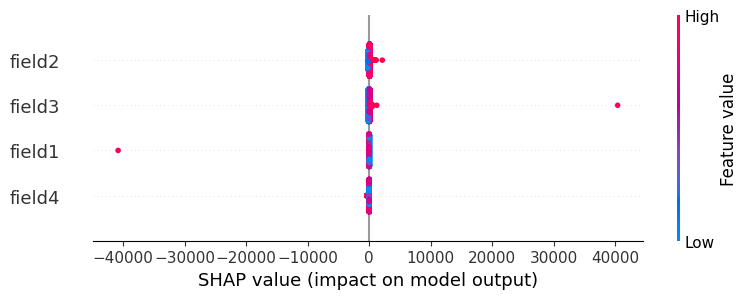

In [12]:
import shap

# Assuming 'field1', 'field2', 'field3' as features and 'entry_id' as the target variable
X = df[['field1', 'field2', 'field3','field4']]
y = df['entry_id']

# Train a linear regression model
model = LinearRegression()
model.fit(X, y)

# Use the LinearExplainer for non-tree-based models
explainer = shap.LinearExplainer(model, X)

# Calculate SHAP values
shap_values = explainer.shap_values(X)

# Summary plot
shap.summary_plot(shap_values, X)


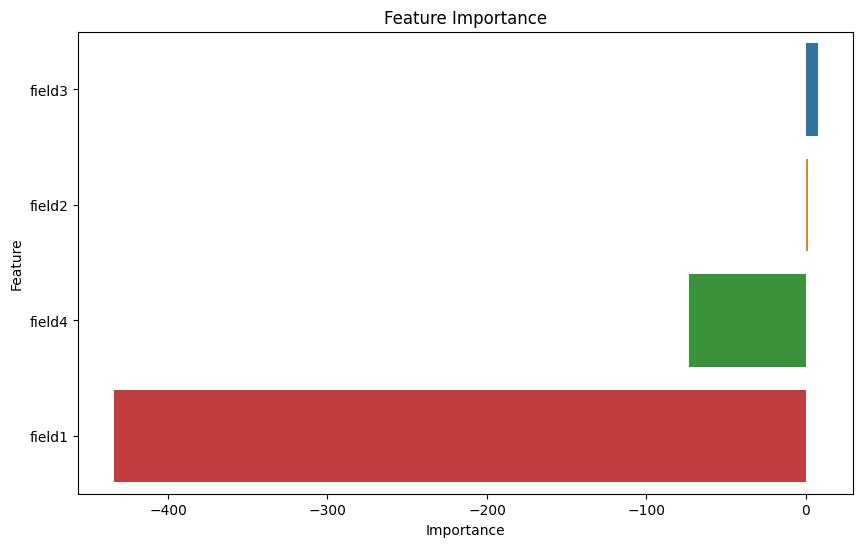

In [13]:
# Example: Feature importance plot
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()


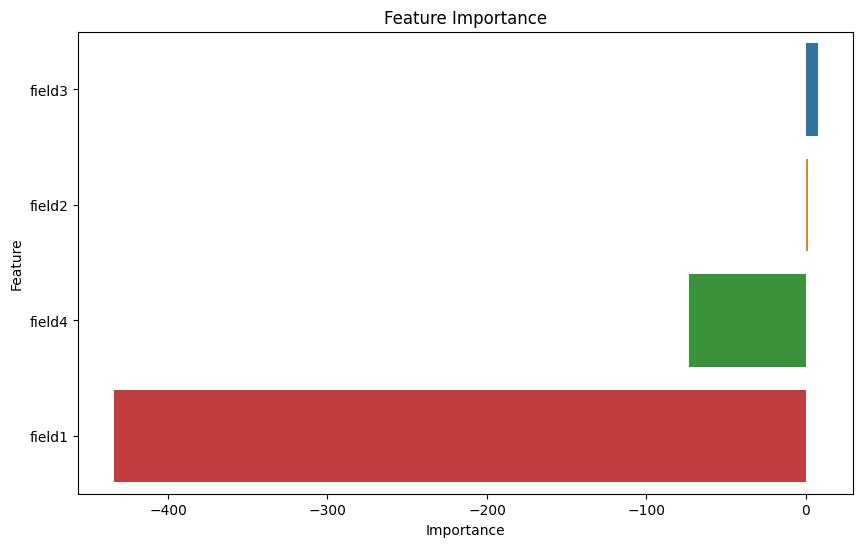

In [14]:
# Example: Feature importance plot
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()


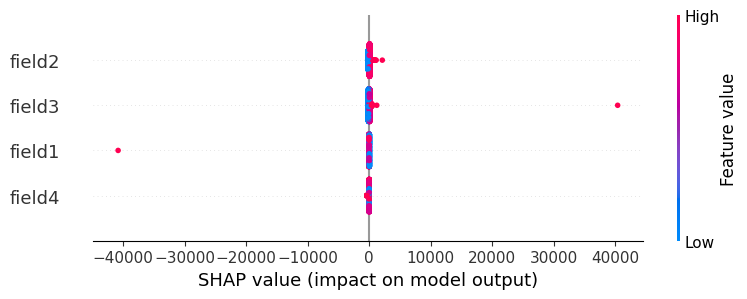

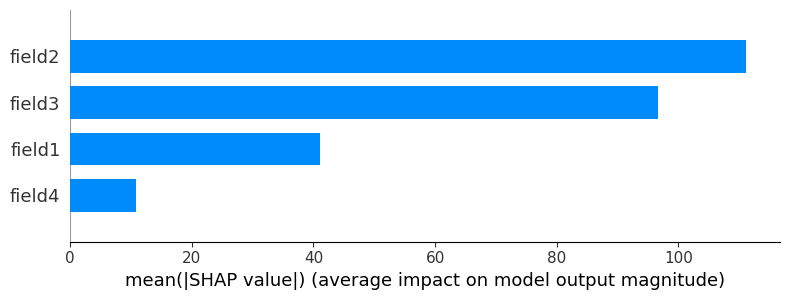

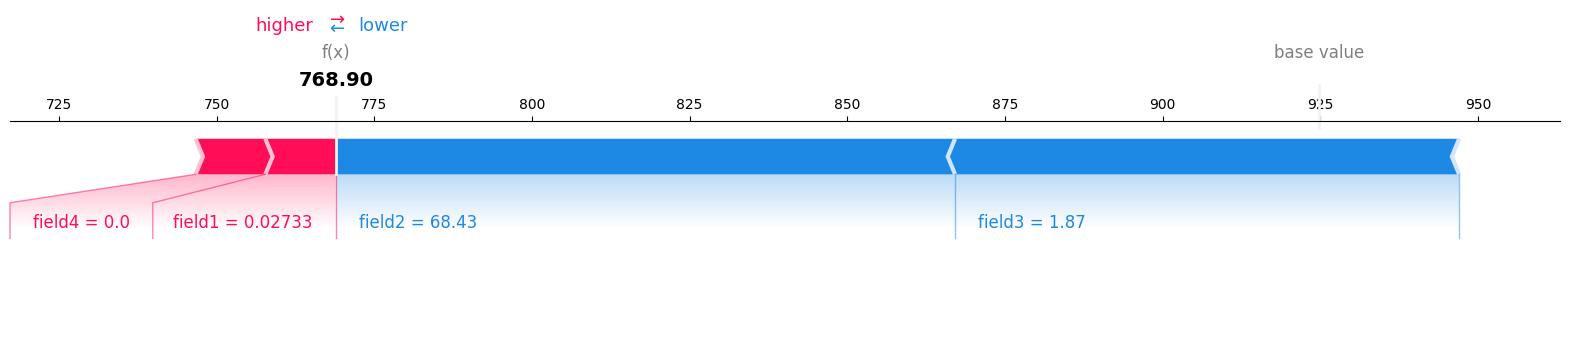

In [17]:
# More analysis using SHAP
import shap

# Assuming 'field1', 'field2', 'field3' as features and 'entry_id' as the target variable
X = df[['field1', 'field2', 'field3','field4']]
y = df['entry_id']

# Train a linear regression model
model = LinearRegression()
model.fit(X, y)

# Use the LinearExplainer for non-tree-based models
explainer = shap.LinearExplainer(model, X)

# Calculate SHAP values
shap_values = explainer.shap_values(X)

# Summary plot
shap.summary_plot(shap_values, X)

# Individual SHAP value plots for each observation
shap.summary_plot(shap_values, X, plot_type="bar")

# Force plot for a specific observation
sample_index = 0  # You can choose any index from your dataset
shap.force_plot(explainer.expected_value, shap_values[sample_index, :], X.iloc[sample_index, :], matplotlib=True)


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming 'field1', 'field2', 'field3' as features and 'entry_id' as the target variable
X = df[['field1', 'field2', 'field3']]
y = df['entry_id']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')


Mean Squared Error on Test Set: 242856.49026277626


In [19]:
from sklearn.tree import DecisionTreeRegressor

# Train a decision tree model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_tree_pred = tree_model.predict(X_test)

# Evaluate the decision tree model
mse_tree = mean_squared_error(y_test, y_tree_pred)
print(f'Mean Squared Error on Test Set (Decision Tree): {mse_tree}')


Mean Squared Error on Test Set (Decision Tree): 131737.8788418739


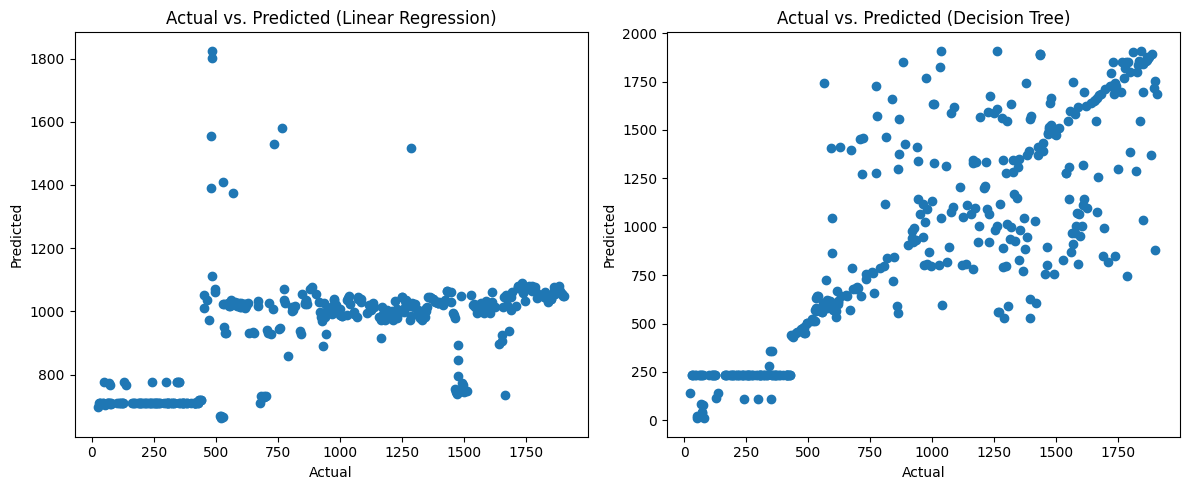

Linear Regression Feature Importance:
  Feature  Coefficient
2  field3     7.077782
1  field2     1.034670
3  field4   -72.411286
0  field1  -406.462745


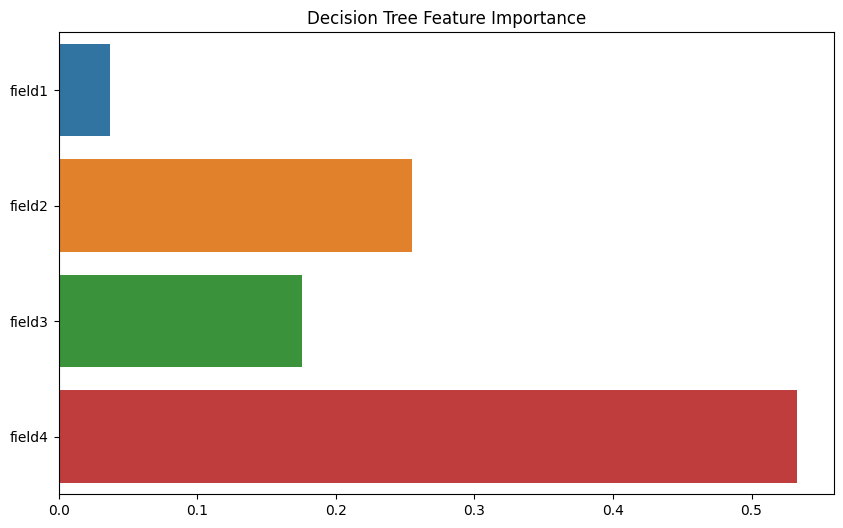


Linear Regression Mean Squared Error on Test Set: 241334.94456139134
Decision Tree Mean Squared Error on Test Set: 105951.30358991963


In [21]:
import shap
from sklearn.tree import DecisionTreeRegressor

# Assuming 'field1', 'field2', 'field3' as features and 'entry_id' as the target variable
X = df[['field1', 'field2', 'field3','field4']]
y = df['entry_id']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Train a decision tree model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# SHAP values for linear regression
explainer_linear = shap.LinearExplainer(linear_model, X_train)
shap_values_linear = explainer_linear.shap_values(X_test)

# SHAP values for decision tree
explainer_tree = shap.TreeExplainer(tree_model)
shap_values_tree = explainer_tree.shap_values(X_test)

# Scatter plot for linear regression
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, linear_model.predict(X_test))
plt.title('Actual vs. Predicted (Linear Regression)')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Scatter plot for decision tree
plt.subplot(1, 2, 2)
plt.scatter(y_test, tree_model.predict(X_test))
plt.title('Actual vs. Predicted (Decision Tree)')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()

# Feature importance table for linear regression
linear_feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': linear_model.coef_})
linear_feature_importance.sort_values(by='Coefficient', ascending=False, inplace=True)
print('Linear Regression Feature Importance:')
print(linear_feature_importance)

# Feature importance plot for decision tree
plt.figure(figsize=(10, 6))
sns.barplot(x=tree_model.feature_importances_, y=X.columns)
plt.title('Decision Tree Feature Importance')
plt.show()

# Performance metrics for linear regression
linear_mse = mean_squared_error(y_test, linear_model.predict(X_test))
print(f'\nLinear Regression Mean Squared Error on Test Set: {linear_mse}')

# Performance metrics for decision tree
tree_mse = mean_squared_error(y_test, tree_model.predict(X_test))
print(f'Decision Tree Mean Squared Error on Test Set: {tree_mse}')


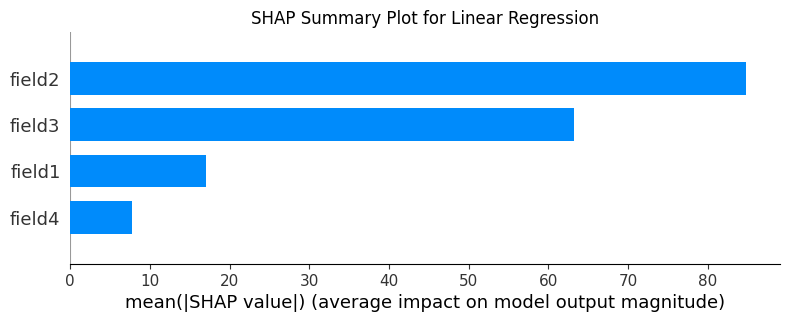

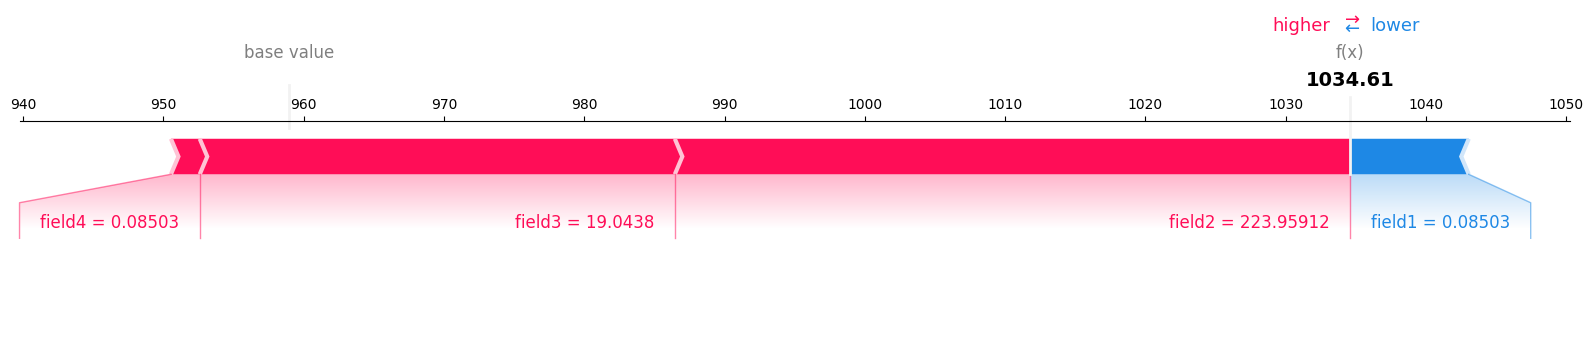

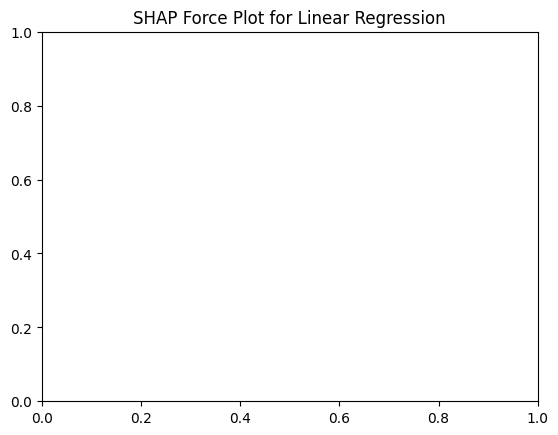

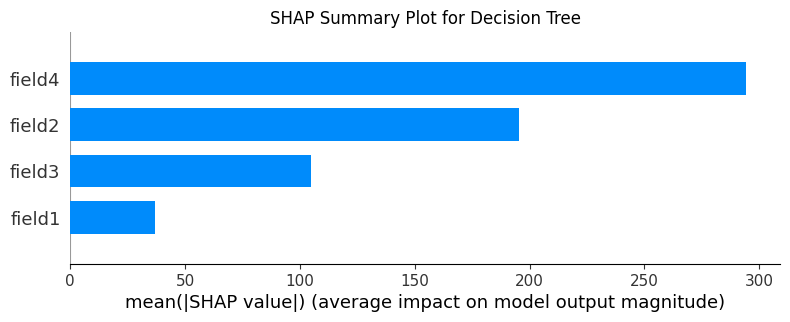

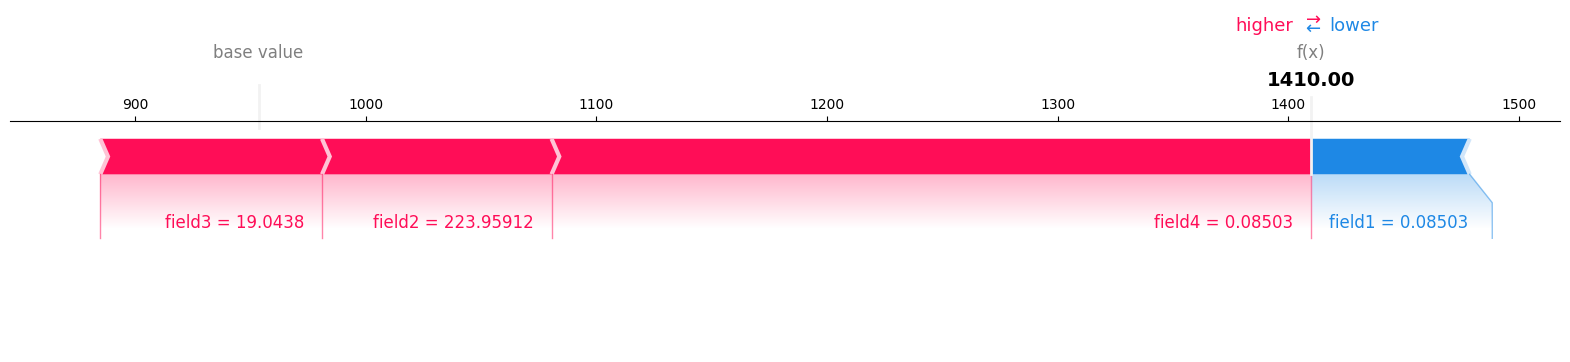

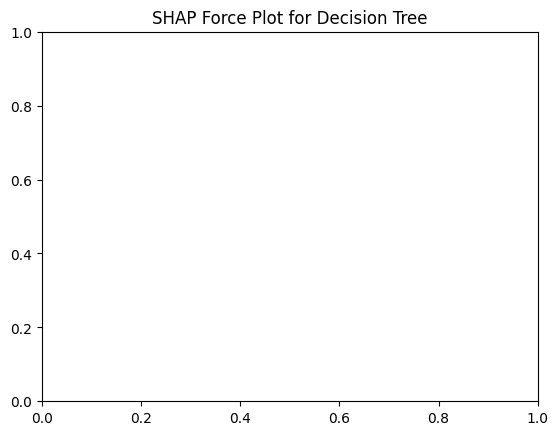

In [23]:
import shap
from sklearn.tree import DecisionTreeRegressor

# Assuming 'field1', 'field2', 'field3' as features and 'entry_id' as the target variable
X = df[['field1', 'field2', 'field3','field4']]
y = df['entry_id']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Train a decision tree model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# SHAP values for linear regression
explainer_linear = shap.LinearExplainer(linear_model, X_train)
shap_values_linear = explainer_linear.shap_values(X_test)

# SHAP values for decision tree
explainer_tree = shap.TreeExplainer(tree_model)
shap_values_tree = explainer_tree.shap_values(X_test)

# Summary plot for linear regression
shap.summary_plot(shap_values_linear, X_test, plot_type="bar", show=False)
plt.title('SHAP Summary Plot for Linear Regression')
plt.show()

# Force plot for a specific observation (linear regression)
sample_index = 0  # You can choose any index from your dataset
shap.force_plot(explainer_linear.expected_value, shap_values_linear[sample_index, :], X_test.iloc[sample_index, :], matplotlib=True)
plt.title('SHAP Force Plot for Linear Regression')
plt.show()

# Summary plot for decision tree
shap.summary_plot(shap_values_tree, X_test, plot_type="bar", show=False)
plt.title('SHAP Summary Plot for Decision Tree')
plt.show()

# Force plot for a specific observation (decision tree)
shap.force_plot(explainer_tree.expected_value, shap_values_tree[0], X_test.iloc[0, :], matplotlib=True)
plt.title('SHAP Force Plot for Decision Tree')
plt.show()


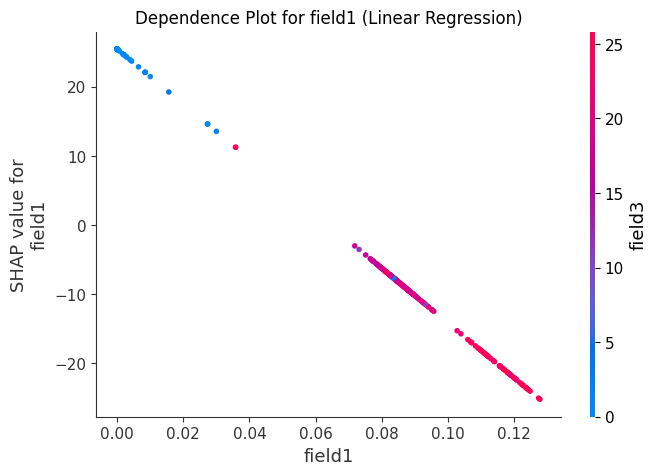

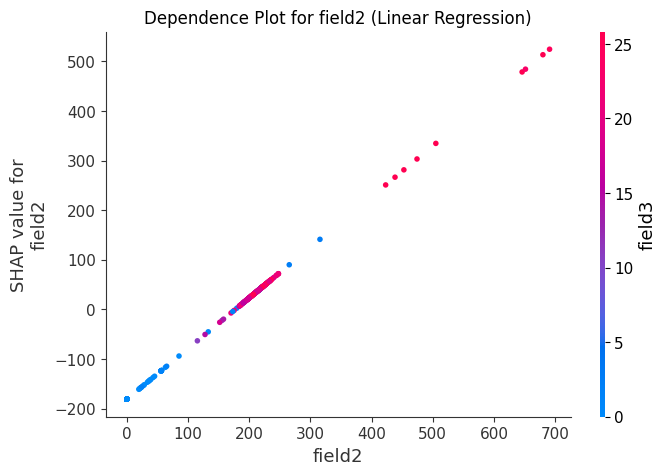

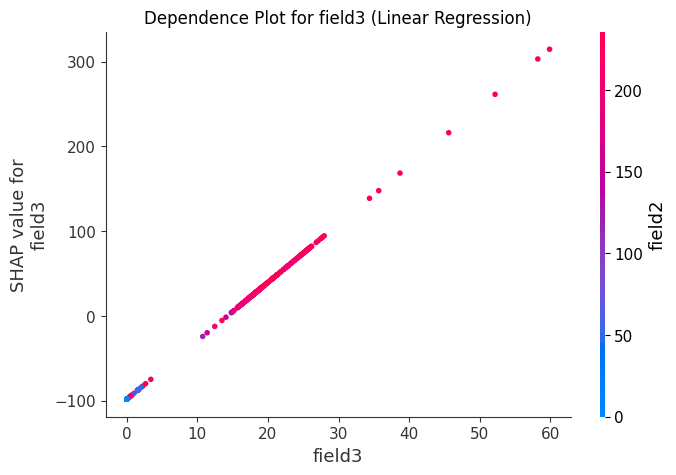

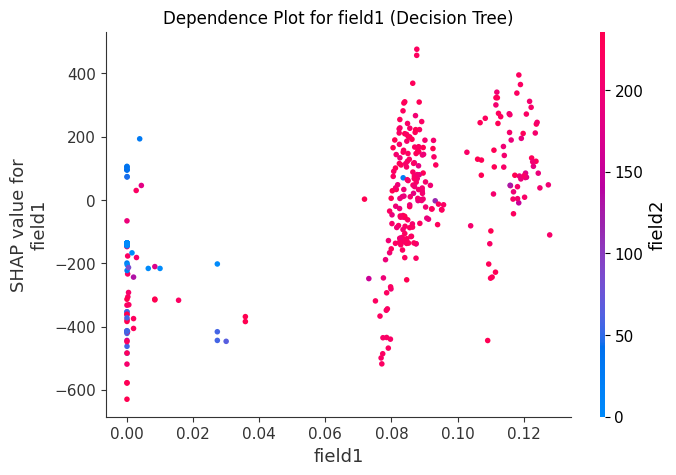

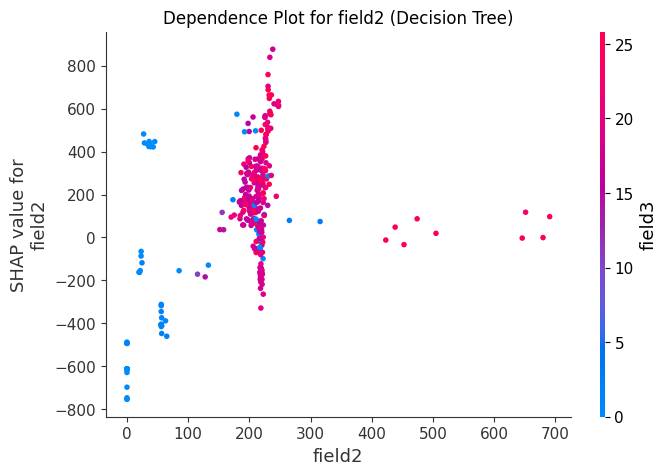

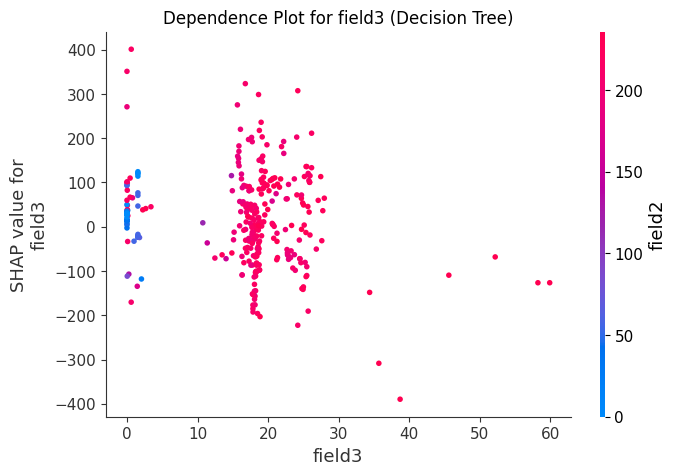

AttributeError: ignored

In [24]:
import shap
from sklearn.tree import DecisionTreeRegressor

# Assuming 'field1', 'field2', 'field3' as features and 'entry_id' as the target variable
X = df[['field1', 'field2', 'field3']]
y = df['entry_id']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Train a decision tree model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# SHAP values for linear regression
explainer_linear = shap.LinearExplainer(linear_model, X_train)
shap_values_linear = explainer_linear.shap_values(X_test)

# SHAP values for decision tree
explainer_tree = shap.TreeExplainer(tree_model)
shap_values_tree = explainer_tree.shap_values(X_test)

# Dependence plots for linear regression
for feature in X.columns:
    shap.dependence_plot(feature, shap_values_linear, X_test, display_features=X_test, show=False)
    plt.title(f'Dependence Plot for {feature} (Linear Regression)')
    plt.show()

# Dependence plots for decision tree
for feature in X.columns:
    shap.dependence_plot(feature, shap_values_tree, X_test, display_features=X_test, show=False)
    plt.title(f'Dependence Plot for {feature} (Decision Tree)')
    plt.show()

# Interaction plots for linear regression
shap.interaction_plot("field1", "field2", shap_values_linear, X_test, display_features=X_test, show=False)
plt.title('Interaction Plot for field1 and field2 (Linear Regression)')
plt.show()

# Interaction plots for decision tree
shap.interaction_plot("field1", "field2", shap_values_tree, X_test, display_features=X_test, show=False)
plt.title('Interaction Plot for field1 and field2 (Decision Tree)')
plt.show()

# Waterfall plot for a specific observation (linear regression)
sample_index = 0  # You can choose any index from your dataset
shap.waterfall_plot(explainer_linear.expected_value, shap_values_linear[sample_index, :], X_test.iloc[sample_index, :], show=False)
plt.title('SHAP Waterfall Plot for Linear Regression')
plt.show()

# Waterfall plot for a specific observation (decision tree)
shap.waterfall_plot(explainer_tree.expected_value, shap_values_tree[0], X_test.iloc[0, :], show=False)
plt.title('SHAP Waterfall Plot for Decision Tree')
plt.show()

# Table summarizing SHAP values for a specific observation
shap.summary_plot(shap_values_linear, X_test, plot_type="bar", show=False)
plt.title('SHAP Summary Plot for Linear Regression')
plt.show()


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


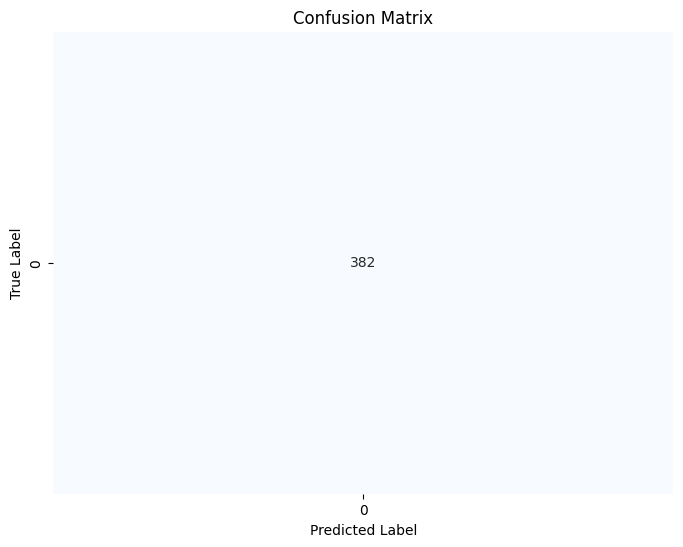

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       382

    accuracy                           1.00       382
   macro avg       1.00      1.00      1.00       382
weighted avg       1.00      1.00      1.00       382



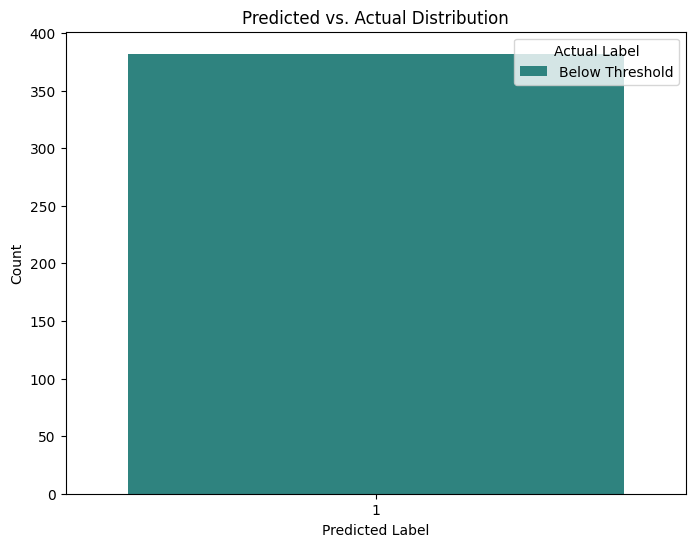

In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import Binarizer

# Assuming 'entry_id' is transformed into a binary classification task (e.g., classifying if 'entry_id' is above a certain threshold)
threshold = 3  # You can adjust this threshold based on your problem

# Convert 'entry_id' into binary labels (1 if above the threshold, 0 otherwise)
y_binary = Binarizer(threshold=threshold).fit_transform(y.values.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Train a logistic regression model as an example (for binary classification)
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Bar plot for predicted vs. actual distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y_pred, hue=y_test.ravel(), palette='viridis')
plt.title('Predicted vs. Actual Distribution')
plt.xlabel('Predicted Label')
plt.ylabel('Count')
plt.legend(title='Actual Label', labels=['Below Threshold', 'Above Threshold'])
plt.show()


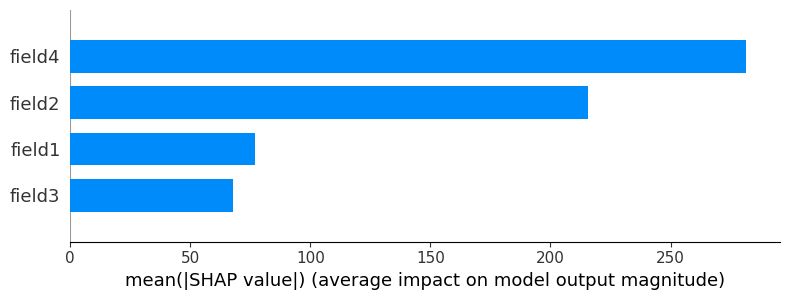

In [30]:
import shap

# Assuming 'entry_id' is the target variable
X = df[['field1', 'field2', 'field3', 'field4']]
y = df['entry_id']

# Train a decision tree model (or another model of your choice)
model = DecisionTreeRegressor(random_state=42)
model.fit(X, y)

# SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Summary plot
shap.summary_plot(shap_values, X, plot_type="bar")



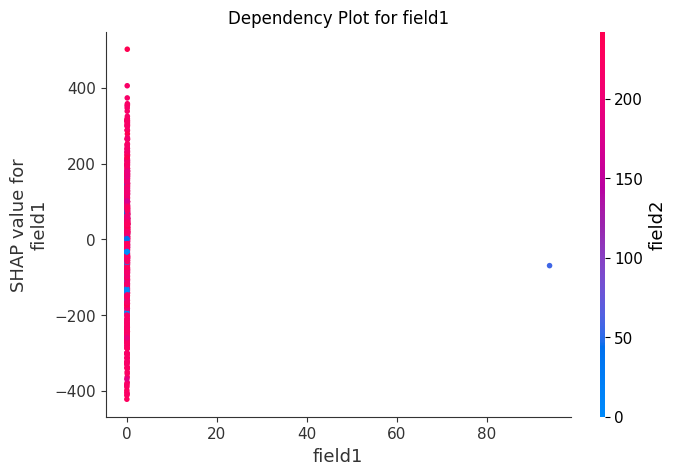

In [32]:
# Dependency plot for field1
shap.dependence_plot("field1", shap_values, X, display_features=X, show=False)
plt.title('Dependency Plot for field1')
plt.show()


In [34]:
from sklearn.metrics import mean_squared_error

# Assuming you have a trained model
y_pred = model.predict(X)

# Calculate Mean Squared Error
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 2408.9421925208944


In [35]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Assuming 'entry_id' is the target variable
X = df[['field1', 'field2', 'field3', 'field4']]
y = df['entry_id']

# Number of folds (K)
num_folds = 5

# Initialize KFold
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize a model (e.g., Linear Regression)
model = LinearRegression()

# Lists to store evaluation metrics for each fold
mse_scores = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model (e.g., using Mean Squared Error)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Display Mean Squared Error for each fold
for i, mse in enumerate(mse_scores, 1):
    print(f'Fold {i} Mean Squared Error: {mse}')

# Calculate and display the average Mean Squared Error across all folds
average_mse = sum(mse_scores) / num_folds
print(f'\nAverage Mean Squared Error: {average_mse}')


Fold 1 Mean Squared Error: 241334.94456139134
Fold 2 Mean Squared Error: 1548398784.625094
Fold 3 Mean Squared Error: 282408.1566793094
Fold 4 Mean Squared Error: 290113.1973610277
Fold 5 Mean Squared Error: 247565.6430702208

Average Mean Squared Error: 309892041.3133532


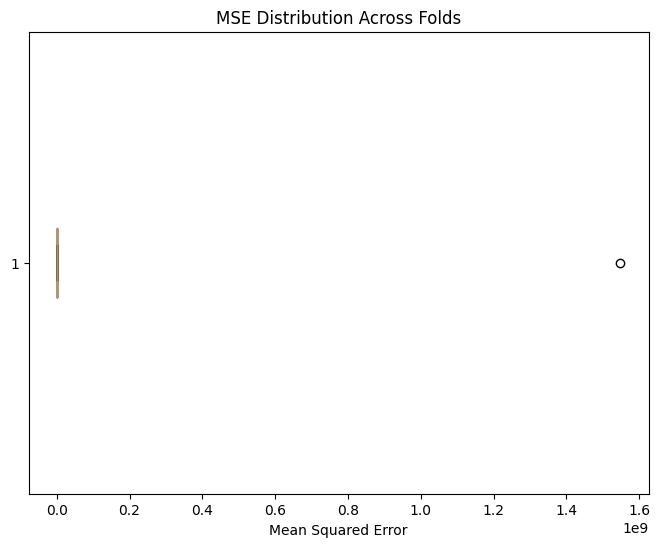

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Assuming 'entry_id' is the target variable
X = df[['field1', 'field2', 'field3', 'field4']]
y = df['entry_id']

# Number of folds (K)
num_folds = 5

# Initialize KFold
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize a model (e.g., Linear Regression)
model = LinearRegression()

# Lists to store evaluation metrics for each fold
mse_scores = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model (e.g., using Mean Squared Error)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Create a boxplot of MSE scores for each fold
plt.figure(figsize=(8, 6))
plt.boxplot(mse_scores, vert=False)
plt.xlabel('Mean Squared Error')
plt.title('MSE Distribution Across Folds')
plt.show()
